In [1]:
from tensorflow.keras import models
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
model = models.load_model('C10.h5')

In [2]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,708 (1.79 MB)

 Trainable params: 469,706 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [3]:
# def ObjectDetection(threshold):
#     path = str(input('Enter path of Image: '))
#     img  = tf.io.read_file(path)
#     img  = tf.image.decode_jpeg(img, channels=3)
#     plt.imshow(img)
#     img  = tf.image.resize(img, [32,32])
#     img  = img / 255.0
#     img  = tf.expand_dims(img, axis=0)
#     # Model: Object Detection
#     probabilities = model.predict(img)
#     class_indices = [i for i, prob in enumerate(probabilities.reshape(-1,)) if prob>=threshold]
#     label= [classes[i] for i in class_indices]
#     print(f"\u2022 Detected Objects: {label}")

In [4]:
def object_detection(threshold):
    path=str(input("Enter path of image: "))
    img=tf.io.read_file(path)
    img=tf.image.decode_jpeg(img,channels=3)
    plt.imshow(img)
    img=tf.image.resize(img,[32,32])
    img=img/255.0
    img=tf.expand_dims(img,axis=0)

    #Model :Object Detection
    probabilities=model.predict(img)
    class_indices=[i for i,prob in enumerate(probabilities.reshape(-1,)) if prob>=threshold]
    label=[classes[i] for i in class_indices]
    print(f"Detected Objects :{label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Detected Objects :['dog']


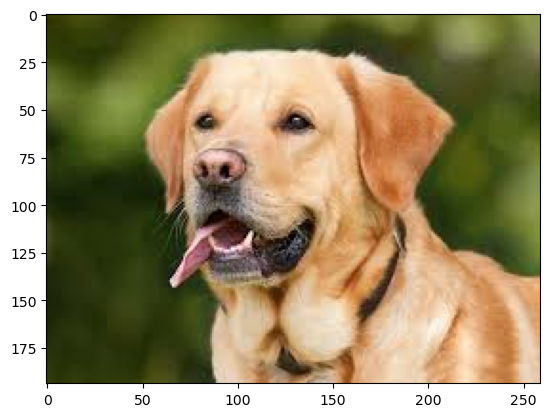

In [5]:
object_detection(0.5)